Лабораторна робота № 5
Смислов Даніл
ІП-01

Спочатку імпортуємо потрібні для роботи бібліотеки

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


Далі імпортуємо дані з файлу wine.csv з кодуванням 'cp1252' та розділювачем ','. Розглянемо структуру датафрейму.

In [2]:
def getDataset():
    data = pd.read_csv('wine.csv',sep=',',encoding='cp1252')
    return data 

dataset = getDataset()
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Як ми бачимо, з типом проблем немає. Давайте перевіримо на негативні значення.

In [3]:
for column in dataset.columns:
    print(column + ": ")
    print(dataset[dataset[column]<0])

fixed acidity: 
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []
volatile acidity: 
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []
citric acid: 
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []
residual sugar: 
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []
chlorides: 
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, dens

Як ми бачимо, негативних значень немає. Тому можемо працювати з даними. Давайте перевіримо наші значення в колонках на нормальність розподілу, використовуючи критерій Пірсона, адже розмір вибірки є досить великим.


In [4]:
import scipy.stats as stats
def testPirsona(data):
    statistic, p = stats.normaltest(data)
    print('Pirsona:', 'Statistic: %.4f P: %.30f' % (statistic,p))
    if(p > 0.05):
        print('Нормальний розподіл')
    else:
        print(len(data))
        print('Не нормальний розподіл')

for column in dataset.columns:
    print(column)
    testPirsona(dataset[column])


fixed acidity
Pirsona: Statistic: 224.5309 P: 0.000000000000000000000000000000
1599
Не нормальний розподіл
volatile acidity
Pirsona: Statistic: 143.4193 P: 0.000000000000000000000000000000
1599
Не нормальний розподіл
citric acid
Pirsona: Statistic: 152.0392 P: 0.000000000000000000000000000000
1599
Не нормальний розподіл
residual sugar
Pirsona: Statistic: 1520.3240 P: 0.000000000000000000000000000000
1599
Не нормальний розподіл
chlorides
Pirsona: Statistic: 1783.1059 P: 0.000000000000000000000000000000
1599
Не нормальний розподіл
free sulfur dioxide
Pirsona: Statistic: 342.2591 P: 0.000000000000000000000000000000
1599
Не нормальний розподіл
total sulfur dioxide
Pirsona: Statistic: 487.4273 P: 0.000000000000000000000000000000
1599
Не нормальний розподіл
density
Pirsona: Statistic: 30.7077 P: 0.000000214732027381022219054632
1599
Не нормальний розподіл
pH
Pirsona: Statistic: 33.6847 P: 0.000000048468645347727715715864
1599
Не нормальний розподіл
sulphates
Pirsona: Statistic: 906.8944 P: 0

Як бачимо, розподіли не нормального виду. Давайте розрахуємо матрицю кореляції для даних.

In [5]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Давайте побудуємо діаграму розмаху для стовпчика 'chlorides', до прикладу.

<AxesSubplot:>

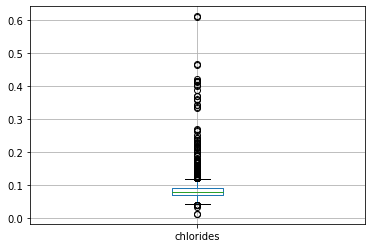

In [6]:
 
dataset.boxplot('chlorides')


Як ми бачимо, є "викиди" та значення досить сильно різняться. Давайте напишемо функцію для відкидання "викидів" та застосуємо до стовпця. 

<AxesSubplot:>

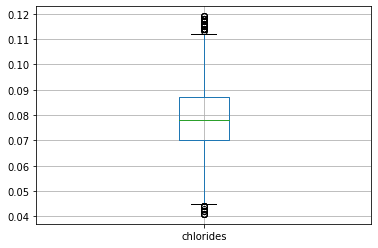

In [7]:
def deleteEmission(dataset,columnName):
    Q1 = dataset[columnName].quantile(.25)
    Q3 = dataset[columnName].quantile(.75)
    center = Q3 - Q1
    dataset = dataset.drop(dataset[dataset[columnName]<(Q1-1.5* center)].index)
    dataset = dataset.drop(dataset[dataset[columnName]>(Q3 + 1.5* center)].index)
    return dataset

dataset = deleteEmission(dataset,'chlorides')
dataset.boxplot('chlorides')


Як ми бачимо, тепер немає таких виражених "викидів". Тепер застосуємо нашу функцію до всіх стовпців.

<AxesSubplot:>

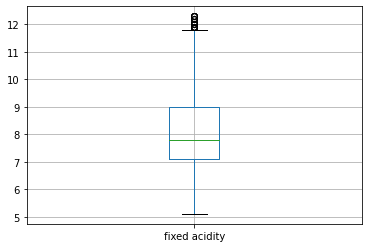

In [8]:
for columnName in dataset.columns:
    dataset = deleteEmission(dataset,columnName)

dataset.boxplot('fixed acidity')